In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2 

In [2]:
x1 = np.array([
    [62,79,23,119,120,105,4,0],
    [10,10,9,62,12,78,34,0],
    [10,58,197,46,46,0,0,48],
    [176,135,5,188,191,68,0,49],
    [2,1,1,29,26,37,0,77],
    [0,89,144,147,187,102,62,208],
    [255,252,0,166,123,62,0,31],
    [166,63,127,17,1,0,99,30],
]).astype(np.uint8)
x2 = np.array([
    [9,7,1,1,1,2,2,1],
    [8,9,9,7,1,1,1,1],
    [7,8,9,7,1,2,1,1],
    [8,9,9,9,9,1,1,2],
    [8,9,9,7,7,2,1,3],
    [9,9,9,9,8,2,2,1],
    [9,9,8,8,7,1,2,1],
    [8,9,8,6,5,1,1,3],
    
]).astype(np.uint8)

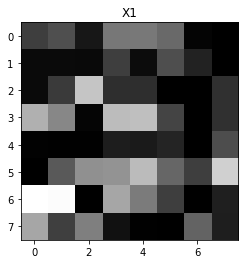

In [3]:
plt.imshow(x1,cmap='gray')
plt.title('X1')
plt.show()

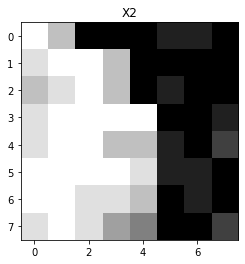

In [4]:
plt.imshow(x2,cmap='gray')
plt.title('X2')
plt.show()

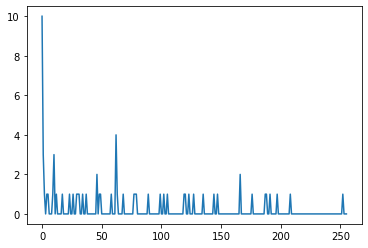

In [5]:
hist1 = cv2.calcHist([x1],[0],None,[256],[0,255])
plt.plot(hist1)

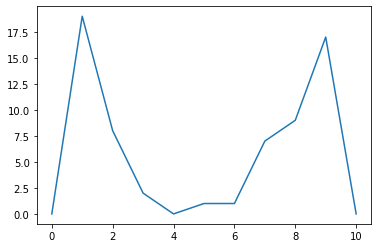

In [6]:
hist2 = cv2.calcHist([x2],[0],None,[11],[0,10])
plt.plot(hist2)

In [7]:
ret,thresh1 = cv2.threshold(x1,127,1,cv2.THRESH_BINARY)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 1]
 [1 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


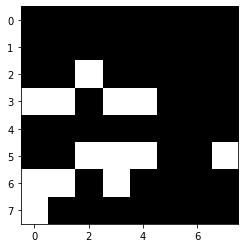

In [8]:
print(thresh1)
plt.imshow(thresh1,cmap='gray')

In [9]:
ret,thresh2 = cv2.threshold(x2,5,1,cv2.THRESH_BINARY)

[[1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 0 0 0 0]]


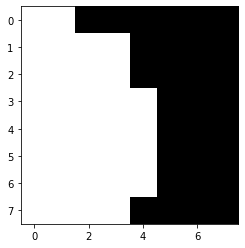

In [10]:
print(thresh2)
plt.imshow(thresh2,cmap='gray')

In [11]:
# filter f1
def filter_f1(img, alpha=1, a=0):
    w, h = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            if 0 <= img[i][j] and  img[i][j] < a:
                ret[i][j] = 0
            else:
                ret[i][j] = img[i][j] * alpha
    return ret

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0]
 [ 88  67   0  94  95   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0  72  73  93   0   0 104]
 [127 126   0  83   0   0   0   0]
 [ 83   0   0   0   0   0   0   0]]


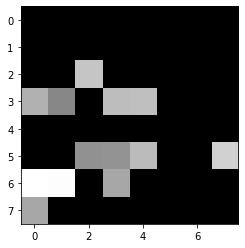

In [12]:
x1_f1 = filter_f1(x1,alpha=0.5,a=128)
print(x1_f1)
plt.imshow(x1_f1,cmap='gray')

[[27 21  0  0  0  0  0  0]
 [24 27 27 21  0  0  0  0]
 [21 24 27 21  0  0  0  0]
 [24 27 27 27 27  0  0  0]
 [24 27 27 21 21  0  0  0]
 [27 27 27 27 24  0  0  0]
 [27 27 24 24 21  0  0  0]
 [24 27 24 18 15  0  0  0]]


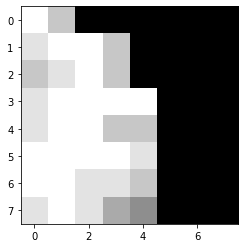

In [13]:
x2_f1 = filter_f1(x2,alpha=3,a=5)
print(x2_f1)
plt.imshow(x2_f1,cmap='gray')

In [14]:
# filter f2
def filter_f2(img,a,b,beta,L):    
    w, h = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            if 0 <= img[i][j] and img[i][j] < a:
                ret[i][j] = 0
            elif a <= img[i][j] and img[i][j] < b:
                ret[i][j] = beta*(img[i][j] - a)
            elif b <= img[i][j] and img[i][j] < L:
                ret[i][j] = beta*(b - a)
    return ret

[[ 36  87   0 150 150 150   0   0]
 [  0   0   0  36   0  84   0   0]
 [  0  24 150   0   0   0   0   0]
 [150 150   0 150 150  54   0   0]
 [  0   0   0   0   0   0   0  81]
 [  0 117 150 150 150 150  36 150]
 [  0 150   0 150 150  36   0   0]
 [150  39 150   0   0   0 147   0]]


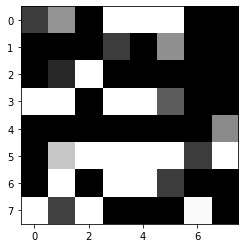

In [15]:
x1_f2 = filter_f2(x1,a=50,b=100,beta=3,L=255)
print(x1_f2)
plt.imshow(x1_f2,cmap='gray')

[[3 3 0 0 0 0 0 0]
 [3 3 3 3 0 0 0 0]
 [3 3 3 3 0 0 0 0]
 [3 3 3 3 3 0 0 0]
 [3 3 3 3 3 0 0 3]
 [3 3 3 3 3 0 0 0]
 [3 3 3 3 3 0 0 0]
 [3 3 3 3 3 0 0 3]]


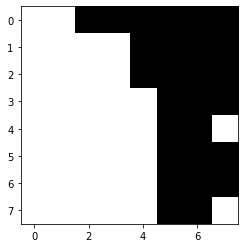

In [16]:
x2_f2 = filter_f2(x2,a=2,b=3,beta=3,L=10)
print(x2_f2)
plt.imshow(x2_f2,cmap='gray')

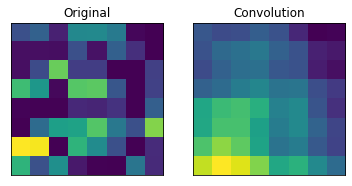

before convolution: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
after convolution: 
 [[ 56  52  53  59  54  40  29  30]
 [ 54  63  66  69  60  54  38  36]
 [ 52  60  65  66  56  54  37  33]
 [ 60  64  71  75  67  68  53  46]
 [ 88  97  99  92  73  76  55  43]
 [ 89 100 100  86  71  76  61  50]
 [101 112 104  87  67  71  57  49]
 [120 129 124 110  89  93  76  64]]


In [17]:
kernel = np.ones((5,5),np.float32)/25

x1_conv = cv2.filter2D(x1,-1,kernel)

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(x1_conv),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before convolution: \n',x1)
print('after convolution: \n',x1_conv)

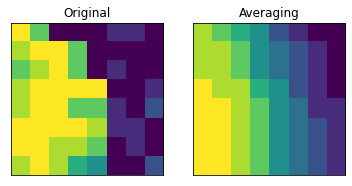

before convolution: 
 [[9 7 1 1 1 2 2 1]
 [8 9 9 7 1 1 1 1]
 [7 8 9 7 1 2 1 1]
 [8 9 9 9 9 1 1 2]
 [8 9 9 7 7 2 1 3]
 [9 9 9 9 8 2 2 1]
 [9 9 8 8 7 1 2 1]
 [8 9 8 6 5 1 1 3]]
after convolution: 
 [[8 7 6 5 3 2 1 1]
 [8 8 7 5 4 3 2 1]
 [8 8 7 5 4 3 2 1]
 [9 8 8 6 5 3 2 1]
 [9 9 8 7 5 4 2 2]
 [9 9 8 7 5 4 3 2]
 [9 9 8 7 5 4 3 2]
 [9 9 8 7 5 4 3 2]]


In [18]:
kernel = np.ones((5,5),np.float32)/25

# args: img, ddepth, kernel
# when ddepth=-1, the output image will have the same depth as the source.
x2_conv = cv2.filter2D(x2,-1,kernel) 

plt.subplot(121),plt.imshow(x2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(x2_conv),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
print('before convolution: \n',x2)
print('after convolution: \n',x2_conv)

In [19]:
x1

array([[ 62,  79,  23, 119, 120, 105,   4,   0],
       [ 10,  10,   9,  62,  12,  78,  34,   0],
       [ 10,  58, 197,  46,  46,   0,   0,  48],
       [176, 135,   5, 188, 191,  68,   0,  49],
       [  2,   1,   1,  29,  26,  37,   0,  77],
       [  0,  89, 144, 147, 187, 102,  62, 208],
       [255, 252,   0, 166, 123,  62,   0,  31],
       [166,  63, 127,  17,   1,   0,  99,  30]], dtype=uint8)

In [20]:
x2

array([[9, 7, 1, 1, 1, 2, 2, 1],
       [8, 9, 9, 7, 1, 1, 1, 1],
       [7, 8, 9, 7, 1, 2, 1, 1],
       [8, 9, 9, 9, 9, 1, 1, 2],
       [8, 9, 9, 7, 7, 2, 1, 3],
       [9, 9, 9, 9, 8, 2, 2, 1],
       [9, 9, 8, 8, 7, 1, 2, 1],
       [8, 9, 8, 6, 5, 1, 1, 3]], dtype=uint8)

In [22]:
def locMin(matrix):
    kernel = [
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ]
    output = []
    for line in matrix:
        newLine = []
        for point in line:
            

def locMax(matrix):
    return
def locMo(matrix):
    return
def locDong(matrix):
    return
    

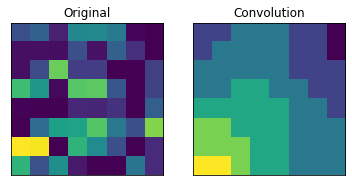

before convolution: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
after convolution: 
 [[2 2 3 3 3 2 2 1]
 [2 3 3 3 3 2 2 1]
 [3 3 3 3 3 2 2 2]
 [3 3 4 4 3 3 2 2]
 [4 4 4 4 4 3 3 2]
 [5 5 4 4 4 3 3 3]
 [5 5 5 4 4 3 3 3]
 [6 6 5 4 4 3 3 3]]


In [31]:
kernel = np.ones((3,3),np.float32)/25

x1_conv1 = cv2.filter2D(x1,-1,kernel)


plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(x1_conv),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before convolution: \n',x1)
print('after convolution: \n',x1_conv)

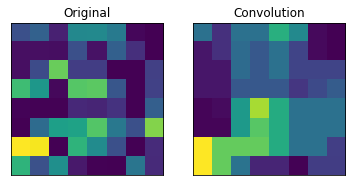

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
after median filter: 
 [[ 62  23  62  62 105  78   4   0]
 [ 10  23  58  46  62  34   4   0]
 [ 10  10  58  46  62  34  34  34]
 [ 10  10  46  46  46  26  37  48]
 [  2   5  89 144 102  62  62  62]
 [  2   2  89 123 102  62  62  62]
 [166 127 127 127 102  62  62  31]
 [166 127  63  17  17   1  30  30]]


In [32]:
x1_median_blue = cv2.medianBlur(x1,3)

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(x1_median_blue),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('after median filter: \n',x1_median_blue)

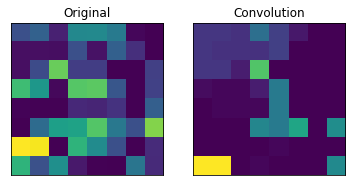

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[10 10  9 23 12  4  0  0]
 [10  9  9  9 12  0  0  0]
 [10 10  5 46  0  0  0  0]
 [ 2  1  1  5 26  0  0  0]
 [ 0  1  1  1 26  0  0  0]
 [ 0  0  0 29 26 37  0 31]
 [ 0  0  0  0  1  0  0  0]
 [63 63  0  1  0  0  0 30]]


In [38]:
#     cv::Mat kernel = cv::getStructuringElement(MORPH_CROSS, Size(5,5));
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc min ( lọc co, lọc erosion )
output = cv2.morphologyEx(x1, cv2.MORPH_ERODE, kernel);

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

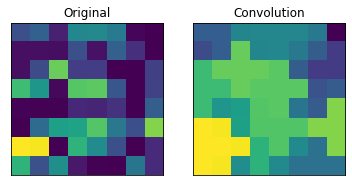

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[ 79  79 119 120 120 120 105   4]
 [ 62  79 197 119 120 105  78  48]
 [176 197 197 197 191  78  48  49]
 [176 176 197 191 191 191  68  77]
 [176 135 144 188 191 102  77 208]
 [255 252 147 187 187 187 208 208]
 [255 255 252 166 187 123  99 208]
 [255 252 127 166 123  99  99  99]]


In [39]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc max (lọc giãn, lọc dilation)
output = cv2.morphologyEx(x1, cv2.MORPH_DILATE, kernel);

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

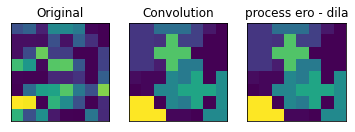

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[10 10 23 23 23 12  4  0]
 [10 10  9 46 12 12  0  0]
 [10 10 46 46 46  0  0  0]
 [10 10  5 46 26 26  0  0]
 [ 2  1  1 29 26 37  0 31]
 [ 0  1 29 29 37 37 37 31]
 [63 63  0 29 26 37  0 31]
 [63 63 63  1  1  0 30 30]]


In [44]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc mở (open, lọc co -> dãn )
output = cv2.morphologyEx(x1, cv2.MORPH_OPEN, kernel);

# phép lọc đóng (close, lọc giãn -> co )
ero = cv2.morphologyEx(x1, cv2.MORPH_ERODE, kernel);
dila = cv2.morphologyEx(ero, cv2.MORPH_DILATE, kernel);

plt.subplot(131),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(dila),plt.title('process ero - dila')
plt.xticks([]), plt.yticks([])

plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

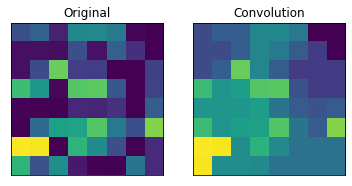

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[ 62  79  79 119 120 105   4   4]
 [ 62  62  79 119 105  78  48   4]
 [ 62  79 197 119  78  48  48  48]
 [176 135 144 188 191  68  48  49]
 [135 135 135 144 102  77  68  77]
 [176 135 144 147 187 102  77 208]
 [255 252 127 166 123  99  99  99]
 [252 127 127 123  99  99  99  99]]


In [41]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc đóng (close, lọc giãn -> co )
output = cv2.morphologyEx(x1, cv2.MORPH_CLOSE, kernel);

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

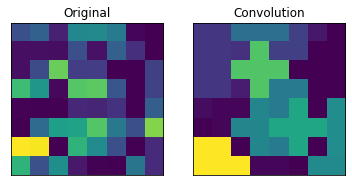

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[10 10 23 23 23 12  4  0]
 [10 10  9 46 12 12  0  0]
 [10 10 46 46 46  0  0  0]
 [10 10  5 46 26 26  0  0]
 [ 2  1  1 29 26 37  0 31]
 [ 0  1 29 29 37 37 37 31]
 [63 63  0 29 26 37  0 31]
 [63 63 63  1  1  0 30 30]]
